# Práctica 1: Sensado y análisis de datos Inerciales
## Evaluación de rutina de ejercicio.

### Librerias

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\Antonio\AppData\Local\Temp\ipykernel_14184\2560546442.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Lectura de datos

In [2]:
folder = "./Data/"
dir_list = os.listdir(folder)
dir_list.sort()
list_df = {}
for i in dir_list:
    df = pd.read_csv(folder + i)
    list_df[i[:-4]] = df

In [3]:
folder = "./Segmentado/"
dir_list = os.listdir(folder)
dir_list.sort()
segmentado_df = []
for i in dir_list:
    df = pd.read_csv(folder + i)
    segmentado_df.append(df)

segmentado_df = pd.concat(segmentado_df)
segmentado_df.reset_index(drop=True, inplace=True)

In [4]:
segmentado_df

,subject,rep,inicio,fin,label
0,Ariana,1,3.6,7.6,2
1,Ariana,2,8.1,12.2,0
2,Ariana,3,12.4,16.0,0
3,Ariana,4,16.2,19.5,0
4,Jonathan,1,3.3,8.5,2
5,Jonathan,2,8.6,12.8,2
6,Jonathan,3,13.0,17.2,2
7,Jonathan,4,17.4,21.6,2
8,Jonathan,5,21.8,25.5,2
9,cristian,1,4.5,9.0,2


### Limpieza y procesado de datos

In [5]:
for index in list_df:
# Renombrar columnas
    columnas = list_df[index].columns
    list_df[index].columns = [col.replace(' ', '').split('(')[0] for col in columnas]
# Transformar datos
    list_df[index]['TimeStamp'] = pd.to_datetime(list_df[index]['TimeStamp'], unit='s')
# Seleccionamos las fetures que analizaremos
    list_df[index] = list_df[index][['SensorId', 'TimeStamp', 'FrameNumber', 'AccX', 'AccY', 'AccZ', 'GyroX','GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ', 'EulerX', 'EulerY', 'EulerZ']]
    if index in ["Scarlett", "Juan", "Ariana", "Rachel"]:
        list_df[index].loc[list_df[index]['SensorId'] == 3, 'SensorId'] = 4

In [6]:
# Estimar los totales
for index in list_df:
    df = list_df[index]
    df['AccTotal'] = np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)
    df['GyroTotal'] = np.sqrt(df['GyroX']**2 + df['GyroY']**2 + df['GyroZ']**2)
    df['MagTotal'] = np.sqrt(df['MagX']**2 + df['MagY']**2 + df['MagZ']**2)
    df['EulerTotal'] = np.sqrt(df['EulerX']**2 + df['EulerY']**2 + df['EulerZ']**2)
    

### Analisis exploratorio

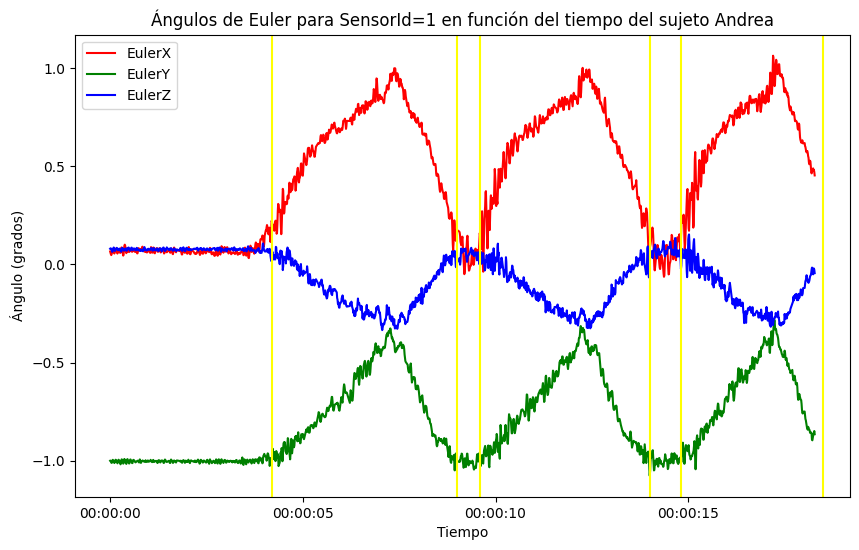

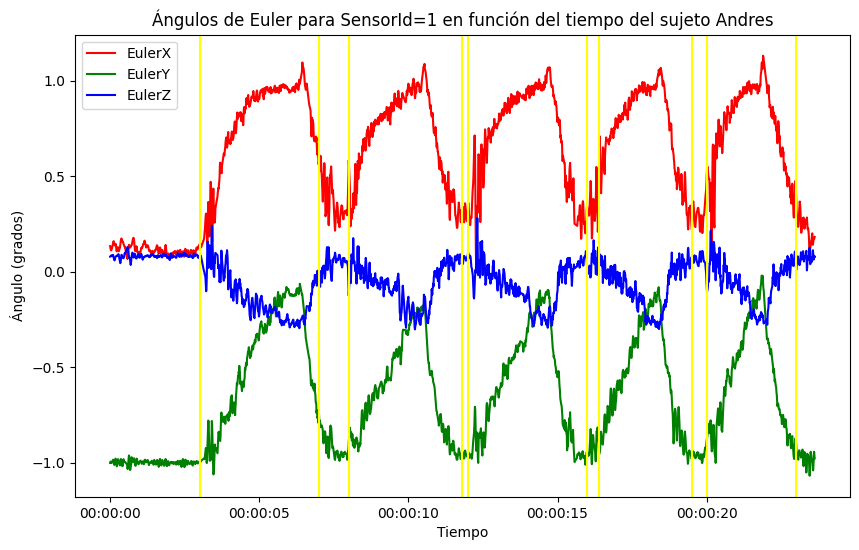

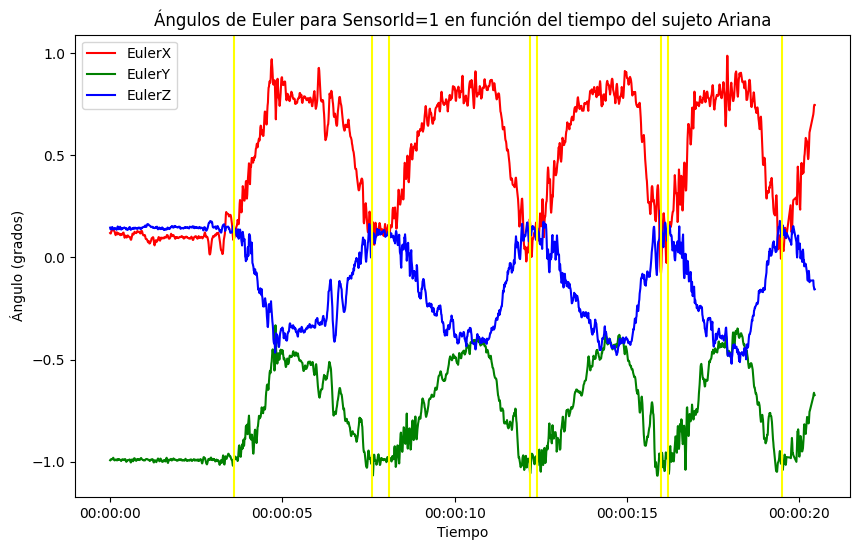

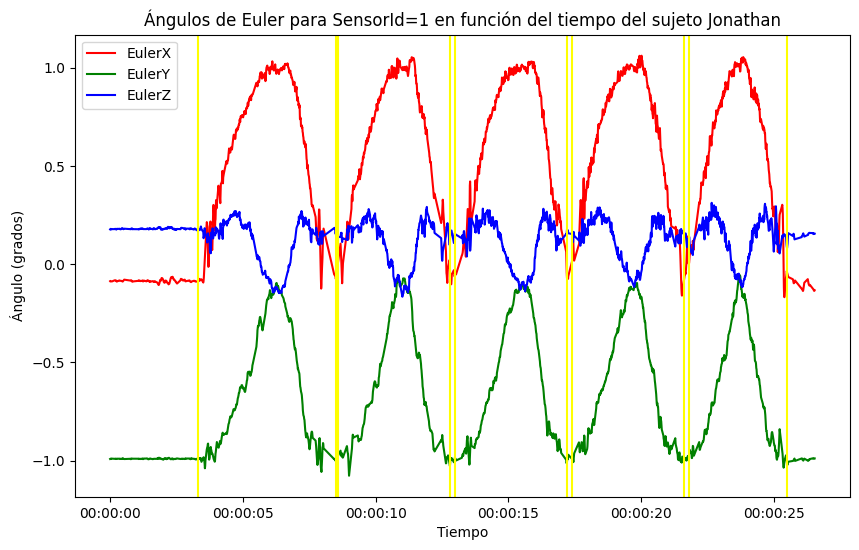

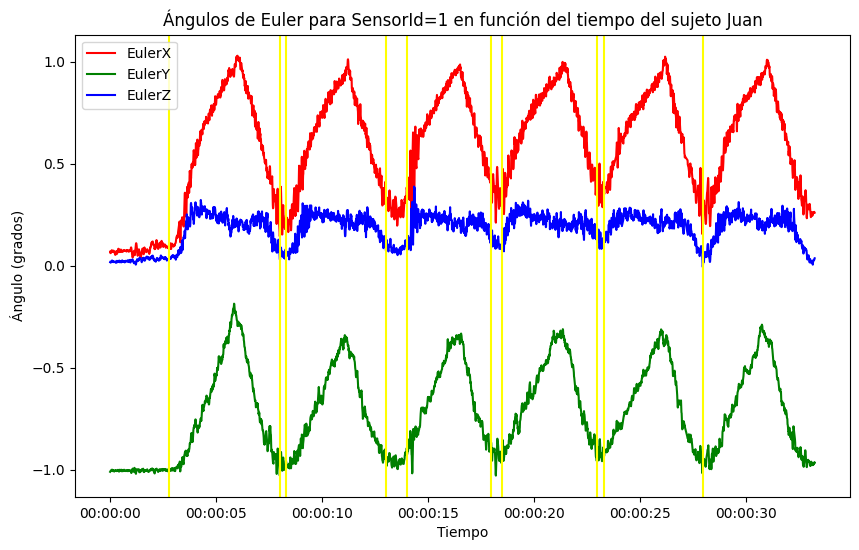

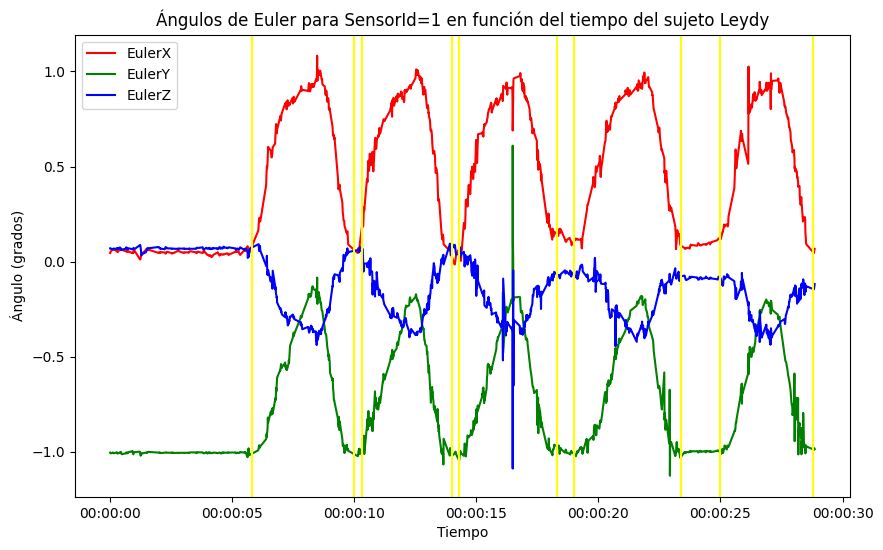

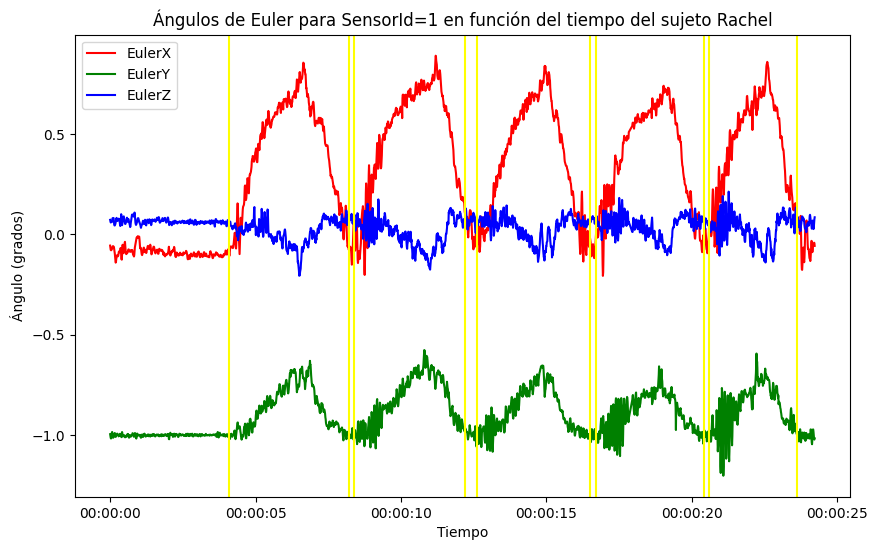

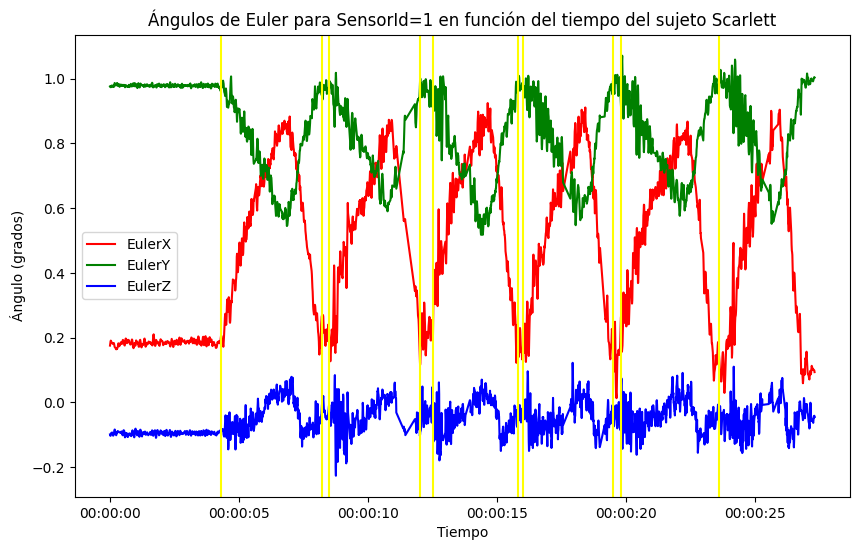

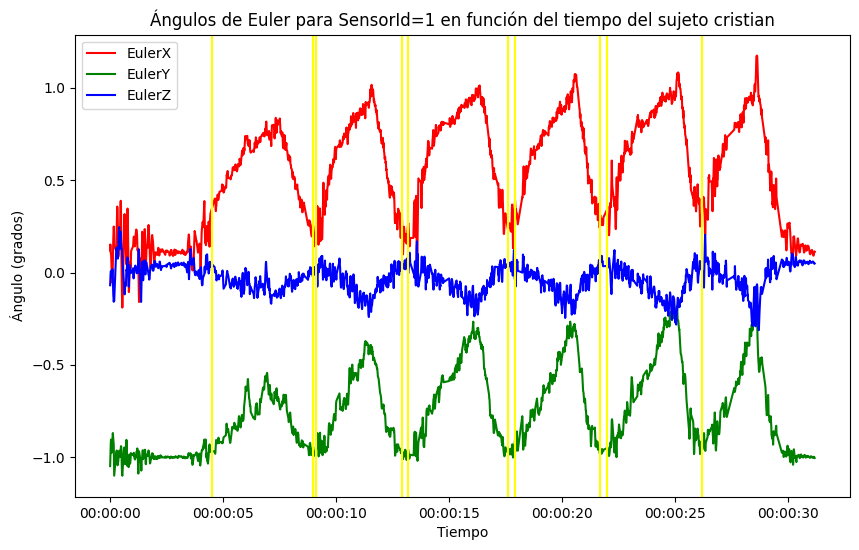

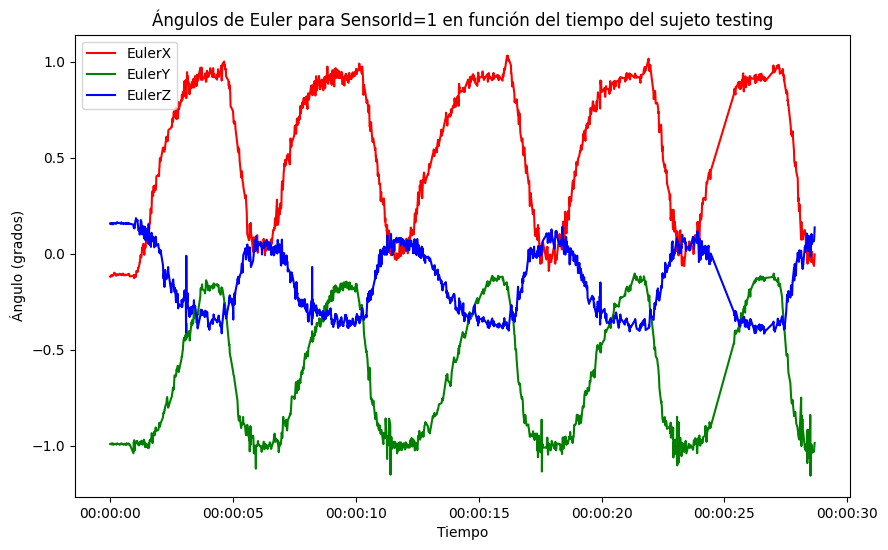

In [7]:
for index in list_df:
    df = list_df[index]
    # Filtrar los datos por SensorId 
    df_sensor_id = df[df["SensorId"] == 1]
    segmentos = segmentado_df[segmentado_df["subject"] == index]
    # Suponiendo que start_time y end_time son valores en segundo
    # Graficar los ángulos de Euler en función del tiempo para SensorId igual a 1
    plt.figure(figsize=(10, 6))
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['AccX'], label='EulerX', color='red')
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['AccY'], label='EulerY', color='green')
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['AccZ'], label='EulerZ', color='blue')
    for i, row in segmentos.iterrows():
        start_time = row["inicio"]
        end_time = row["fin"]
        start_time = pd.to_datetime(start_time, unit='s')
        end_time = pd.to_datetime(end_time, unit='s')
        plt.axvline(x=start_time, color='yellow', linestyle='-')
        plt.axvline(x=end_time, color='yellow', linestyle='-')
    plt.title(f'Ángulos de Euler para SensorId=1 en función del tiempo del sujeto {index}')
    plt.xlabel('Tiempo')
    plt.ylabel('Ángulo (grados)')
    plt.legend()
    plt.show()


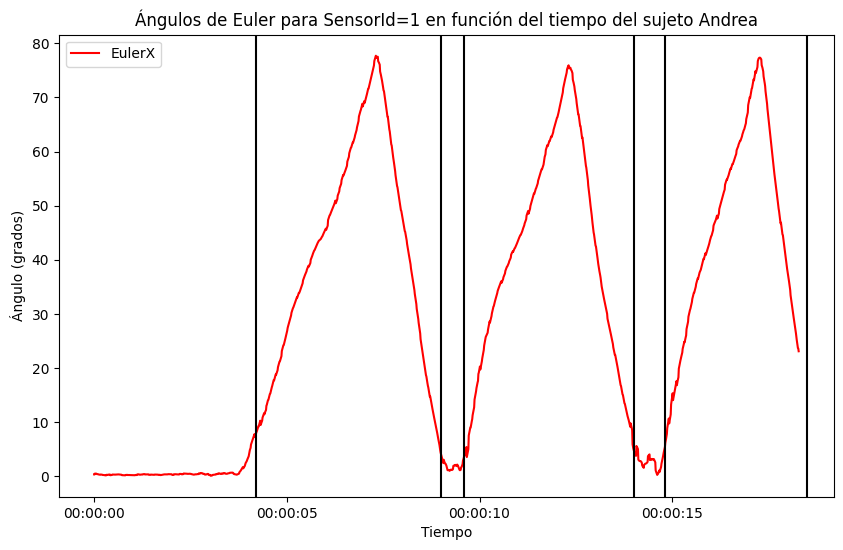

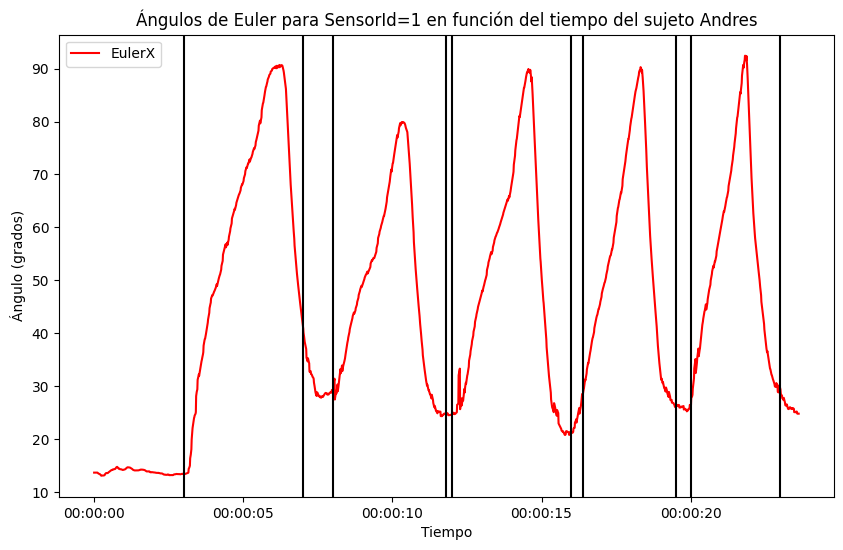

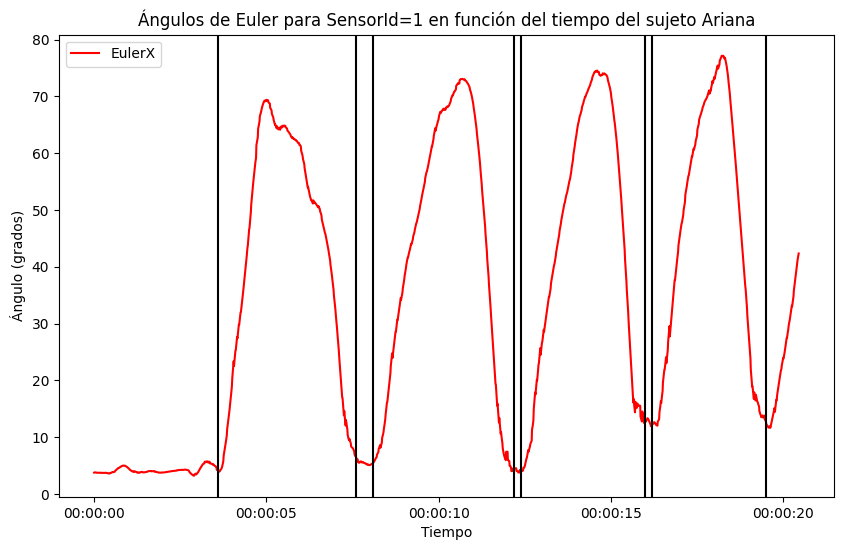

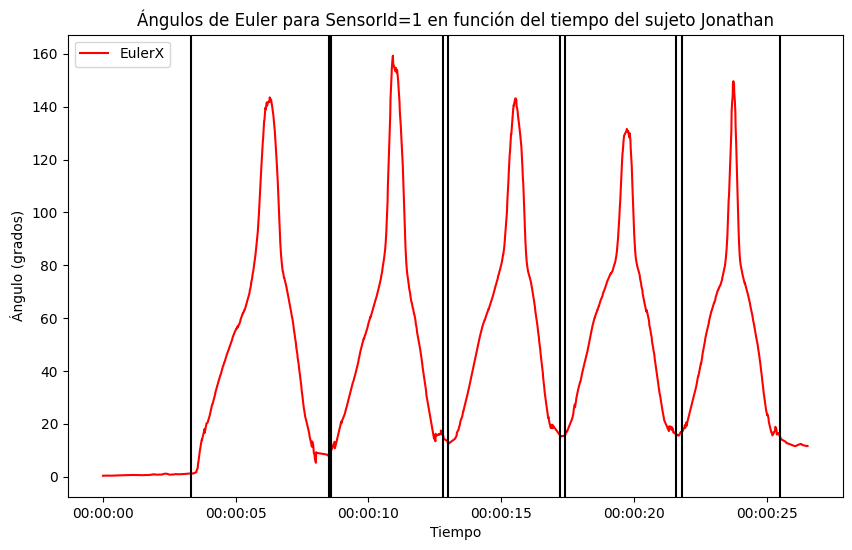

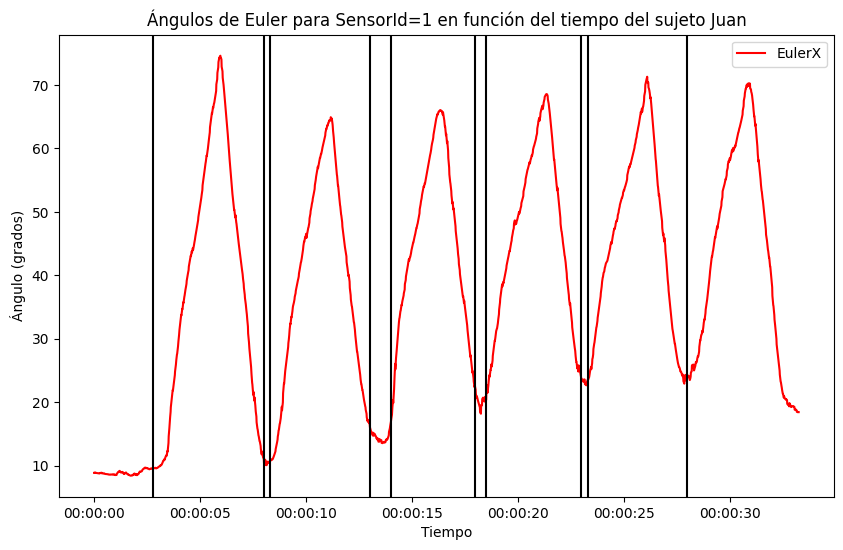

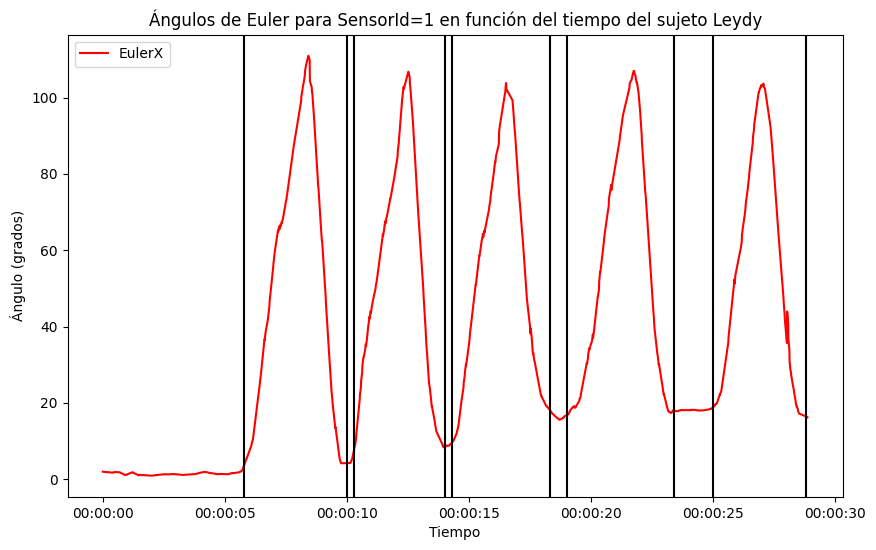

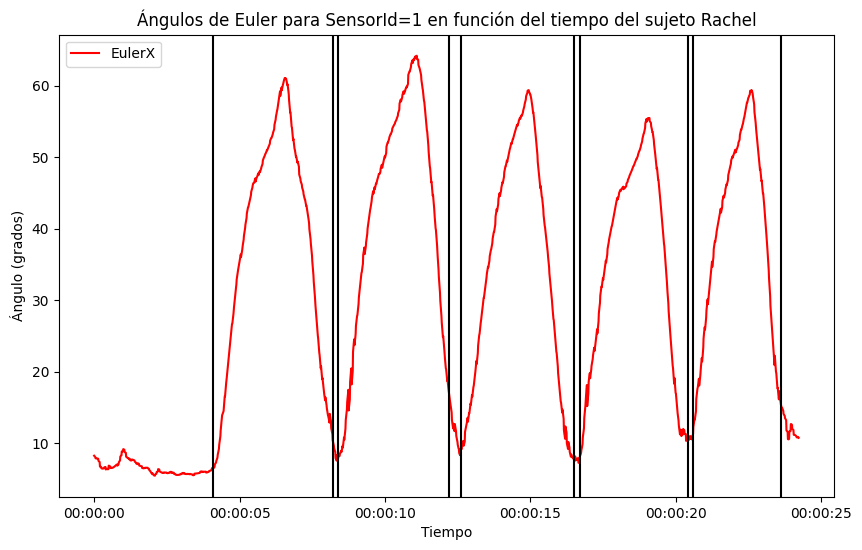

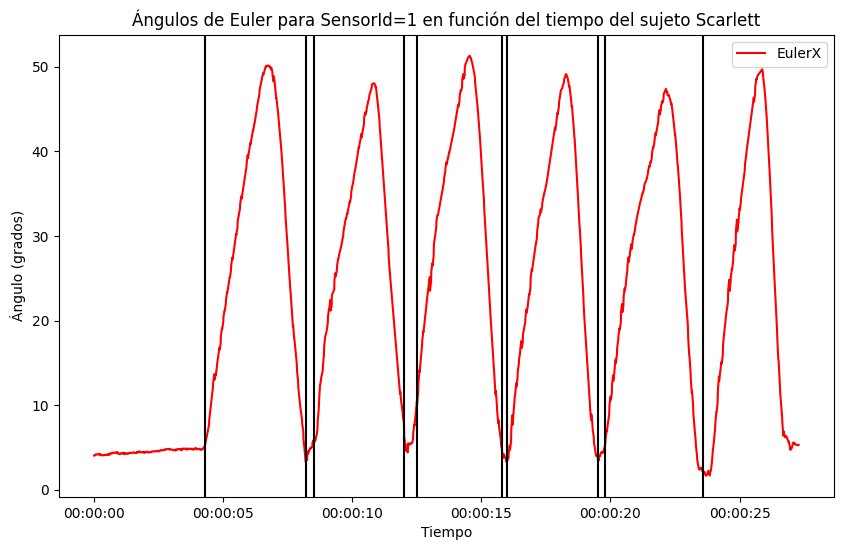

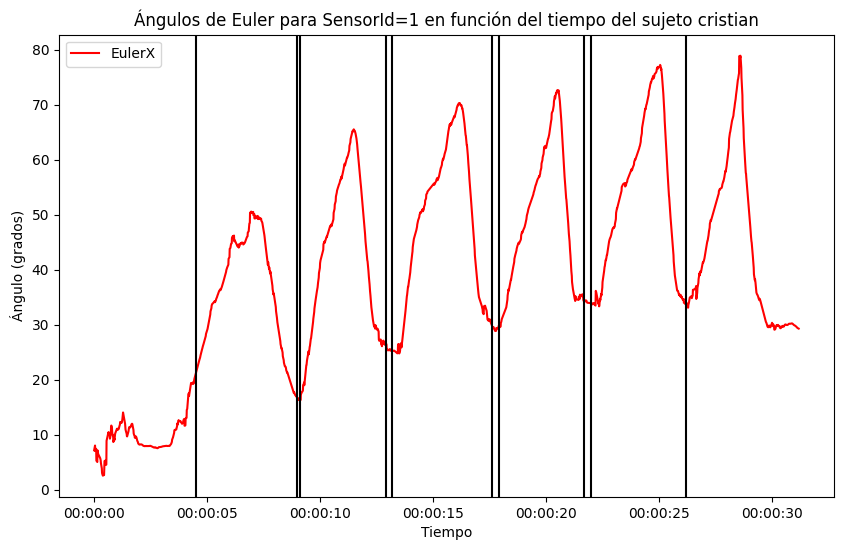

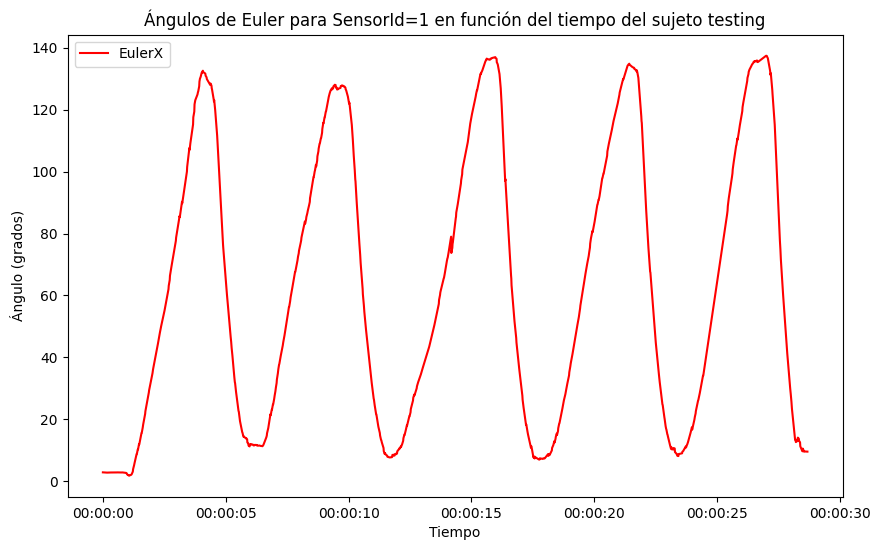

In [8]:
for index in list_df:
    df = list_df[index]
    # Filtrar los datos por SensorId 
    df_sensor_id = df[df["SensorId"] == 1]
    segmentos = segmentado_df[segmentado_df["subject"] == index]
    # Suponiendo que start_time y end_time son valores en segundo
    # Graficar los ángulos de Euler en función del tiempo para SensorId igual a 1
    plt.figure(figsize=(10, 6))
    plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['EulerTotal'], label='EulerX', color='red')
    for i, row in segmentos.iterrows():
        start_time = row["inicio"]
        end_time = row["fin"]
        start_time = pd.to_datetime(start_time, unit='s')
        end_time = pd.to_datetime(end_time, unit='s')
        plt.axvline(x=start_time, color='black', linestyle='-')
        plt.axvline(x=end_time, color='black', linestyle='-')
    plt.title(f'Ángulos de Euler para SensorId=1 en función del tiempo del sujeto {index}')
    plt.xlabel('Tiempo')
    plt.ylabel('Ángulo (grados)')
    plt.legend()
    plt.show()

### Segmentado

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que list_df es un diccionario de DataFrames y segmentado_df es otro DataFrame
# Preparar un diccionario para almacenar los datos de los segmentos con sus etiquetas
segment_data = {}

for index in list_df:
    df = list_df[index]
    segmentos = segmentado_df[segmentado_df["subject"] == index]
    
    # Lista para almacenar datos de segmentos para este sujeto
    segment_data[index] = []
    
    for i, row in segmentos.iterrows():
        start_time = row["inicio"]
        end_time = row["fin"]
        label = row["label"]  # Etiqueta del segmento actual
        start_time = pd.to_datetime(start_time, unit='s')
        end_time = pd.to_datetime(end_time, unit='s')
        
        segment_df = df[(df['TimeStamp'] >= start_time) & (df['TimeStamp'] <= end_time)].copy()
        segment_df['label'] = label
        
        # Almacenar los datos filtrados del segmento junto con su etiqueta
        segment_data[index].append(segment_df)

### Extracción de caracteristicas

In [10]:
import tsfel
import pandas as pd

# Obtener la configuración por defecto de TSFEL para la extracción de características temporales
cfg = tsfel.get_features_by_domain("temporal")

# Inicializar un DataFrame vacío para los vectores de características
features_df = pd.DataFrame()

# Suponer que segment_data es un diccionario con los segmentos de datos de cada sujeto,
# donde cada segmento ya tiene asociada su etiqueta 'label'.
for subject, segments in segment_data.items():
    for segment_df in segments:
        # Asegurarse de que el DataFrame del segmento contenga las columnas requeridas
        if all(column in segment_df.columns for column in ['AccTotal', 'GyroTotal', 'MagTotal', 'EulerTotal']):
            # Seleccionar solo las columnas de interés y convertirlas a un formato adecuado para TSFEL
            segment_data = segment_df[['AccTotal', 'GyroTotal', 'MagTotal', 'EulerTotal']].values

            # Calcular las características para este segmento
            features = tsfel.time_series_features_extractor(cfg, segment_data, fs=1)
            
            # Verificar si 'features' es un DataFrame y luego añadir la etiqueta del segmento
            if isinstance(features, pd.DataFrame):
                # Añadir la etiqueta del segmento de manera segura
                features['label'] = segment_df['label'].iloc[0]  
                # Concatenar con el DataFrame de características
                features_df = pd.concat([features_df, features], ignore_index=True)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [11]:
features_df.to_csv("caracteristicas.csv")

### Selección de caracteristicas

In [12]:
features_df = pd.read_csv("./caracteristicas.csv")
features_df=features_df.drop(['Unnamed: 0'], axis=1)
X = features_df.iloc[:, 1:-1]
#X = features_df.iloc[:, :-1]
Y = features_df.iloc[:, -1]

#### InfoGain

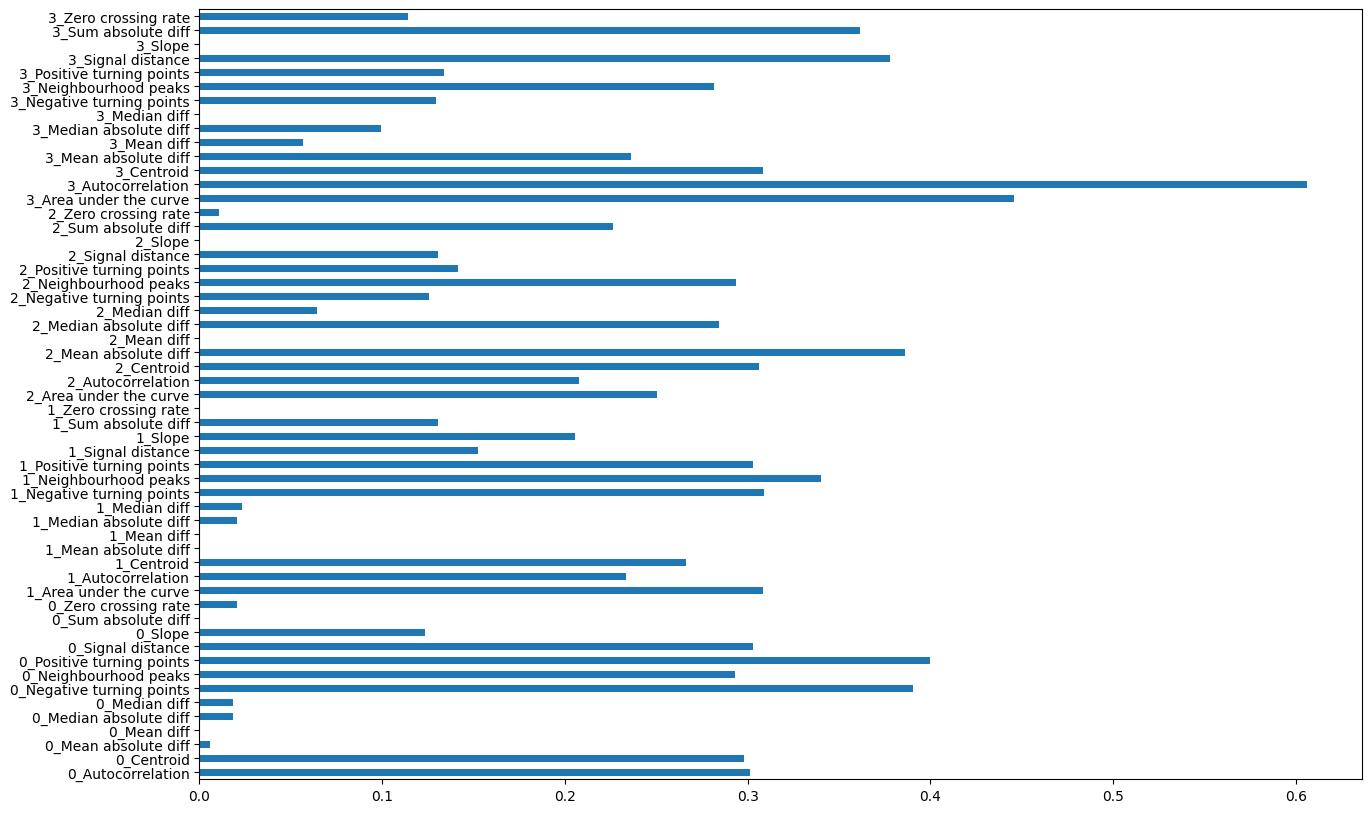

In [13]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

X_new = mutual_info_classif(X, Y)
feat_imp = pd.Series(X_new, features_df.columns[1:len(features_df.columns)-1])
#Si volvio a generar los datos intercambie por la linea comentada.
#feat_imp = pd.Series(X_new, features_df.columns[0:len(features_df.columns)-1])
plt.figure(figsize=(15, 10))
feat_imp.plot(kind='barh')
plt.show()

In [14]:
# Calcular el valor medio entre 0.2 y 0.3
umbral = (0.2 + 0.3) / 2

# Filtrar las características con valores mayores al umbral
selected_features_info_gain = features_df.columns[np.where(X_new > umbral)].tolist()

# Mostrar las características seleccionadas
print("Características seleccionadas con valor mayor a", umbral, ":", selected_features_info_gain)

features_df_info_gain = features_df[selected_features_info_gain]

Características seleccionadas con valor mayor a 0.25 : ['0_Area under the curve', '0_Autocorrelation', '0_Median diff', '0_Negative turning points', '0_Neighbourhood peaks', '0_Positive turning points', '0_Zero crossing rate', '1_Autocorrelation', '1_Median diff', '1_Negative turning points', '1_Neighbourhood peaks', '1_Zero crossing rate', '2_Autocorrelation', '2_Centroid', '2_Mean diff', '2_Negative turning points', '2_Zero crossing rate', '3_Area under the curve', '3_Autocorrelation', '3_Negative turning points', '3_Positive turning points', '3_Slope']


#### Random Forest Importance

<Axes: >

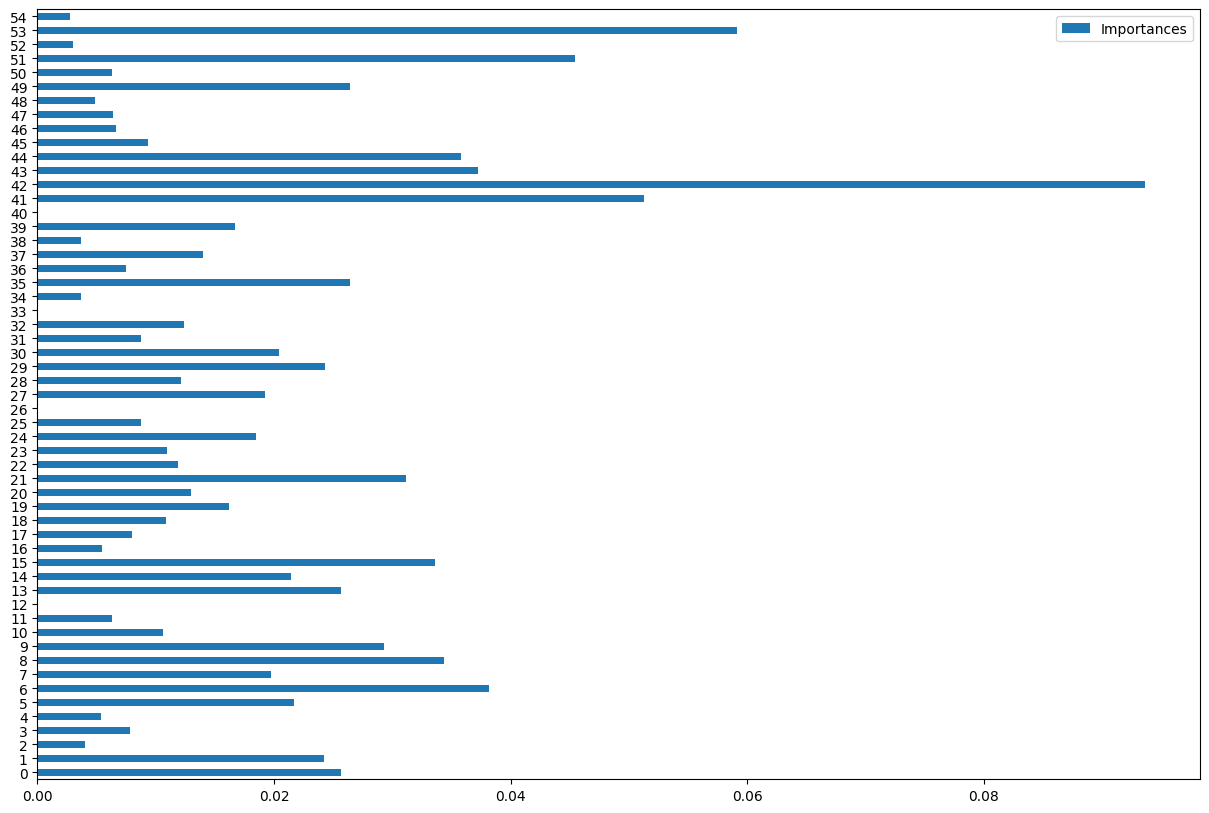

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=340)
model.fit(X,Y)
importances = model.feature_importances_

feat_df = pd.DataFrame({"Features": pd.DataFrame(X).columns, "Importances": importances})
feat_df.set_index('Importances')
feat_df.plot.barh(figsize=(15, 10))

In [16]:
# Filtrar las características con importancia mayor a 0.04
selected_features = feat_df.loc[feat_df['Importances'] > 0.03, 'Features'].tolist()

# Mostrar las características seleccionadas
print("Características seleccionadas con importancia mayor a 0.04:", selected_features)
features_df_importance = features_df[selected_features]

Características seleccionadas con importancia mayor a 0.04: ['0_Negative turning points', '0_Positive turning points', '1_Centroid', '1_Neighbourhood peaks', '3_Area under the curve', '3_Autocorrelation', '3_Centroid', '3_Mean absolute diff', '3_Signal distance', '3_Sum absolute diff']


### Selección de modelos

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [18]:
names = [
    "Nearest Neighbors",
    "Decision Tree",
    "AdaBoost",
    "Naive Bayes",
]
modelos = [
    KNeighborsClassifier(n_neighbors=6),
    DecisionTreeClassifier(max_depth=10),
    AdaBoostClassifier(),
    GaussianNB(),
]

In [19]:
def validacion_cruzada(model, X, y):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    precision_scores = []
    recall_scores = []
    f1_scores = []
    accuracies = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        X_test_np = X_test.values
        y_pred = model.predict(X_test_np)

        precision = precision_score(y_test, y_pred, average='weighted')
        precision_scores.append(precision)

        recall = recall_score(y_test, y_pred, average='weighted')
        recall_scores.append(recall)

        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(f1)

        accuracy = model.score(X_test, y_test)
        accuracies.append(accuracy)

    return np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores), np.mean(accuracies)


In [20]:
encoder = LabelEncoder()
y_encode = encoder.fit_transform(Y)
y_encode

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2],
      dtype=int64)

##### Con los features de infoGain

In [21]:
X = features_df_info_gain.iloc[::]
resultados = []

for nombre, modelo in zip(names, modelos):
    precision, recall, f1, accuracy = validacion_cruzada(model=modelo, X=X, y=y_encode)
    resultados.append({"nombre": nombre, "precision": precision, "recall": recall, "f1_score": f1, "accuracy": accuracy})

df_resultados = pd.DataFrame(resultados)

In [22]:
df_resultados

,nombre,precision,recall,f1_score,accuracy
0,Nearest Neighbors,0.756019,0.694444,0.695074,0.694444
1,Decision Tree,0.767659,0.791667,0.761172,0.791667
2,AdaBoost,0.696032,0.744444,0.708072,0.744444
3,Naive Bayes,0.906019,0.883333,0.885993,0.883333


##### Con los features de Random Forest Importance

In [23]:
model = RandomForestClassifier(n_estimators=340)
f1s, sensitivity, specificity, accuracy = validacion_cruzada(model=model, X=features_df_importance, y=y_encode)
print("F1-score medio:", f1s)
print("Sensibilidad media:", sensitivity)
print("Especificidad media:", specificity)
print("Precisión media:", accuracy)

F1-score medio: 0.8100529100529101
Sensibilidad media: 0.7916666666666666
Especificidad media: 0.7853049728049728
Precisión media: 0.7916666666666666


### Entrenamiento

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encode, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

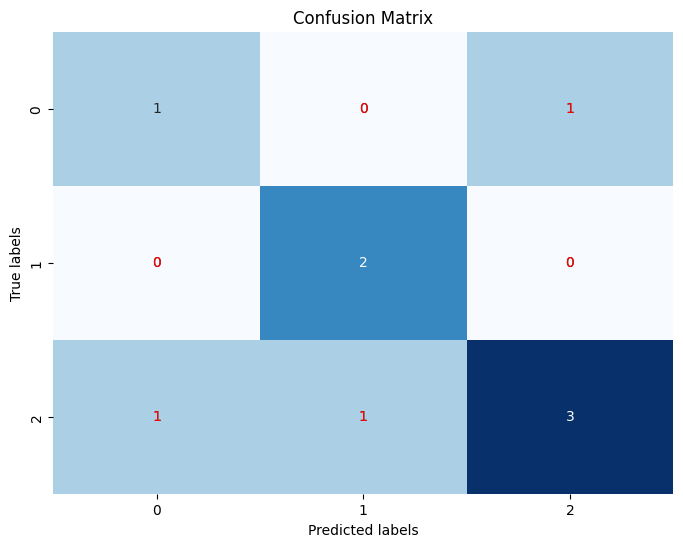

F1 Score: 0.6592592592592593
Sensibilidad (Recall): 0.6666666666666666
Especificidad por clase: [0.8571428571428571, 0.8571428571428571, 0.75]
Exactitud: 0.6666666666666666


In [25]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Obtener predicciones del modelo
y_pred = model.predict(X_test)

# Calcular la matriz de confusión multiclase
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular métricas adicionales
f1 = f1_score(y_test, y_pred, average='weighted')
sensibilidad = recall_score(y_test, y_pred, average='weighted')
exactitud = accuracy_score(y_test, y_pred)

# Calcular especificidad para cada clase
especificidad = []
for i in range(len(conf_matrix)):
    true_negative = np.sum(np.delete(np.delete(conf_matrix, i, 0), i, 1))
    total_negative = np.sum(np.delete(conf_matrix, i, 0))
    especificidad.append(true_negative / total_negative)

# Visualizar la matriz de confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

# Resaltar los valores donde el modelo se confundió
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        if i != j:
            plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha="center", va="center", color="red")

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Imprimir métricas
print("F1 Score:", f1)
print("Sensibilidad (Recall):", sensibilidad)
print("Especificidad por clase:", especificidad)
print("Exactitud:", exactitud)

### Validación

In [26]:
validacion_df = pd.read_csv("./validacion.csv")

In [27]:
# Renombrar columnas
columnas = validacion_df.columns
validacion_df.columns = [col.replace(' ', '').split('(')[0] for col in columnas]
# Transformar datos
validacion_df['TimeStamp'] = pd.to_datetime(validacion_df['TimeStamp'], unit='s')
# Seleccionamos las fetures que analizaremos
validacion_df = validacion_df[['SensorId', 'TimeStamp', 'FrameNumber', 'AccX', 'AccY', 'AccZ', 'GyroX','GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ', 'EulerX', 'EulerY', 'EulerZ']]

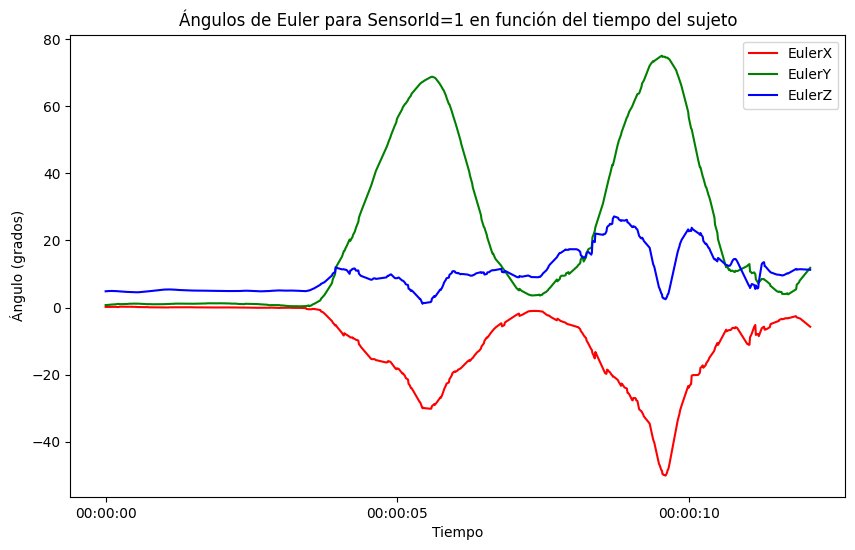

In [34]:
df_sensor_id = validacion_df[validacion_df["SensorId"] == 1]
plt.figure(figsize=(10, 6))
plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['EulerX'], label='EulerX', color='red')
plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['EulerY'], label='EulerY', color='green')
plt.plot(df_sensor_id['TimeStamp'], df_sensor_id['EulerZ'], label='EulerZ', color='blue')
plt.title(f'Ángulos de Euler para SensorId=1 en función del tiempo del sujeto')
plt.xlabel('Tiempo')
plt.ylabel('Ángulo (grados)')
plt.legend()
plt.show()

In [29]:
validacion_df['AccTotal'] = np.sqrt(validacion_df['AccX']**2 + validacion_df['AccY']**2 + validacion_df['AccZ']**2)
validacion_df['GyroTotal'] = np.sqrt(validacion_df['GyroX']**2 + validacion_df['GyroY']**2 + validacion_df['GyroZ']**2)
validacion_df['MagTotal'] = np.sqrt(validacion_df['MagX']**2 + validacion_df['MagY']**2 + validacion_df['MagZ']**2)
validacion_df['EulerTotal'] = np.sqrt(validacion_df['EulerX']**2 + validacion_df['EulerY']**2 + validacion_df['EulerZ']**2)

In [30]:
import tsfel
import pandas as pd
import numpy as np

# Obtener la configuración por defecto de TSFEL para la extracción de características temporales
cfg = tsfel.get_features_by_domain("temporal")

# Inicializar un DataFrame vacío para los vectores de características de validación
validation_features_df = pd.DataFrame()

# Suponer que validation_data es un DataFrame con tus datos de validación
# que tiene las mismas columnas que los datos de entrenamiento.

# Calcular el tamaño de cada segmento de sentadilla
num_squats = 5
squat_segment_size = len(validacion_df) // num_squats

# Extraer características para cada segmento de sentadilla
for squat in range(num_squats):
    start_idx = squat * squat_segment_size
    # Asegurarse de incluir todos los datos en el último segmento
    end_idx = (squat + 1) * squat_segment_size if squat < num_squats - 1 else len(validacion_df)
    
    # Obtener los datos para el segmento actual
    segment_data = validacion_df.iloc[start_idx:end_idx][['AccTotal', 'GyroTotal', 'MagTotal', 'EulerTotal']].values
    
    # Calcular las características para este segmento
    features = tsfel.time_series_features_extractor(cfg, segment_data, fs=1)
    
    # Concatenar con el DataFrame de características de validación
    validation_features_df = pd.concat([validation_features_df, features], ignore_index=True)
    
# El DataFrame validation_features_df ahora contiene las características extraídas de los segmentos de sentadilla


*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [31]:
validation_features_df = validation_features_df[selected_features_info_gain]
validation_features_df

,0_Area under the curve,0_Autocorrelation,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Zero crossing rate,1_Autocorrelation,1_Median diff,1_Negative turning points,...,2_Autocorrelation,2_Centroid,2_Mean diff,2_Negative turning points,2_Zero crossing rate,3_Area under the curve,3_Autocorrelation,3_Negative turning points,3_Positive turning points,3_Slope
0,512.593249,515.204399,0.000071,149.0,25.0,147.0,0.0,6.520677e+02,-0.003922,128.0,...,4.820223e+06,260.791386,0.042467,79.0,0.0,2535.468027,25185.337404,49.0,79.0,0.003353
1,510.843703,511.737944,-0.000060,137.0,25.0,137.0,0.0,8.128062e+04,0.020198,124.0,...,4.872207e+06,254.512796,0.066674,74.0,0.0,3384.629511,43510.004402,52.0,80.0,0.003949
2,516.311990,523.763135,0.000000,111.0,23.0,110.0,0.0,4.937926e+05,0.000000,104.0,...,4.970567e+06,258.336162,-0.072780,80.0,0.0,15489.435428,734296.208376,49.0,75.0,0.036724
3,505.694886,502.468856,-0.000238,127.0,25.0,129.0,0.0,7.972487e+05,-0.089262,111.0,...,5.258860e+06,271.656116,0.024174,104.0,0.0,10153.151166,325588.818394,69.0,80.0,0.058150
4,517.163326,526.872151,0.000259,112.0,24.0,111.0,0.0,1.134630e+06,0.164474,91.0,...,5.702911e+06,248.403944,-0.023158,111.0,0.0,18044.137926,916169.355409,85.0,85.0,-0.131286


In [32]:
# Ahora puedes hacer predicciones con tu modelo
predicted_labels = model.predict(validation_features_df)

In [33]:
for i, label in enumerate(predicted_labels):
    print(f"Sentadilla {i} predicción -> {label}")

Sentadilla 0 predicción -> 2
Sentadilla 1 predicción -> 2
Sentadilla 2 predicción -> 0
Sentadilla 3 predicción -> 0
Sentadilla 4 predicción -> 0
